In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,Wheel Size,Color,No of Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized
0,Third Party insurance,Petrol,998 cc,2015.0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,15.0,White,3.0,MPFi,No,3715.0,1635.0,1565.0,2425.0,5 Speed,FWD,5.0,Power,"tubeless,radial",5.0,235.0,23.1,DOHC,No,4.7,Bangalore,4.00,11.563955,4.00
1,Comprehensive,Petrol,1497 cc,2018.0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,16.0,White,3.0,Direct Injection,No,3998.0,1765.0,1647.0,2519.0,5 Speed,FWD,5.0,Power,"tubeless,radial",4.0,352.0,17.0,DOHC,No,5.3,Bangalore,8.11,10.395344,8.11


In [2]:
df.shape

(8359, 34)

In [3]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols


Index(['Year of Manufacture', 'ownerNo', 'Wheel Size', 'No of Cylinder',
       'Length', 'Width', 'Height', 'Wheel Base', 'Seating Capacity',
       'No Door Numbers', 'Cargo Volumn', 'Mileage', 'Turning Radius',
       'price_in_lakhs', 'km_winsorized', 'price_in_lakhs_winzorized'],
      dtype='object')

# Feature vs Feature

## Numerical Feature vs Numerical Feature

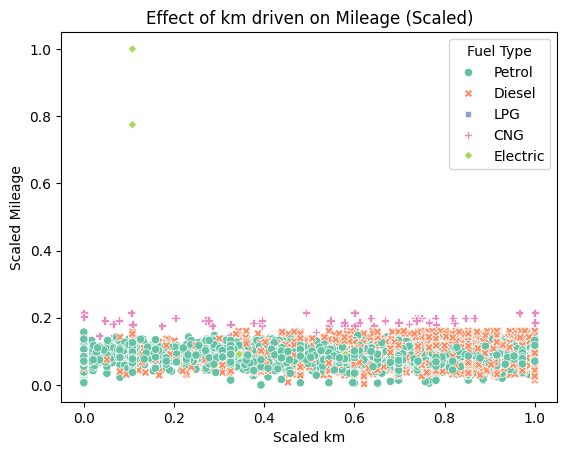

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['km_scaled', 'Mileage_scaled']] = scaler.fit_transform(df[['km_winsorized', 'Mileage']])

sns.scatterplot(x='km_scaled', y='Mileage_scaled', data=df, hue='Fuel Type', style='Fuel Type', palette='Set2')
plt.xlabel('Scaled km')
plt.ylabel('Scaled Mileage')
plt.title('Effect of km driven on Mileage (Scaled)')
plt.show()


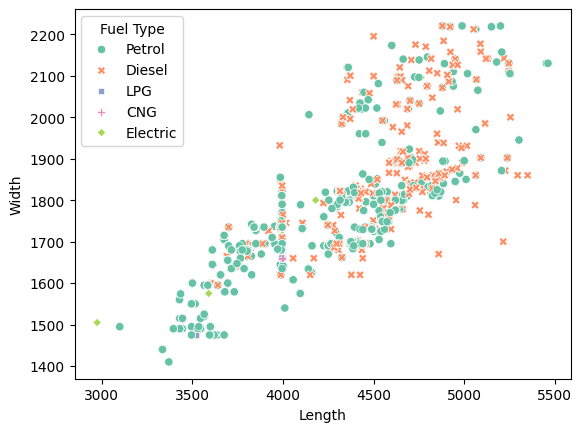

In [9]:
sns.scatterplot(x='Length',y='Width',data=df, hue='Fuel Type',style='Fuel Type', palette='Set2')
plt.show()

## Numerical features vs Target(Numerical)

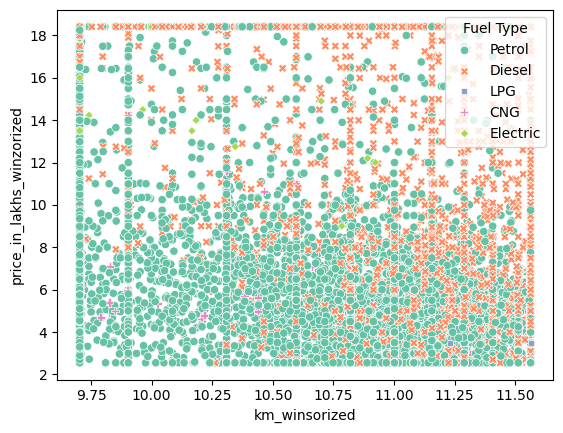

In [20]:
sns.scatterplot(x='km_winsorized',y='price_in_lakhs_winzorized',data=df, hue='Fuel Type',style='Fuel Type', palette='Set2')
plt.show()

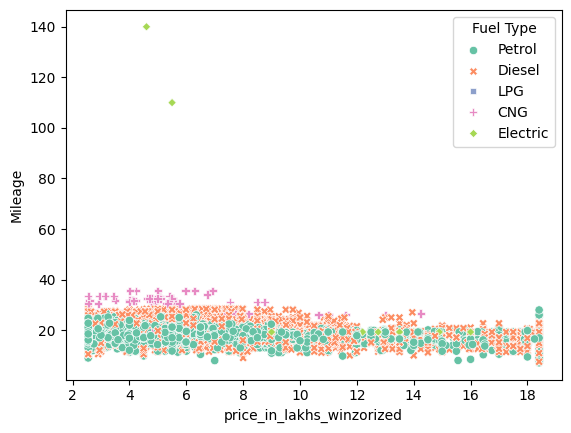

In [21]:
sns.scatterplot(x='price_in_lakhs_winzorized',y='Mileage',data=df, hue='Fuel Type',style='Fuel Type', palette='Set2')
plt.show()

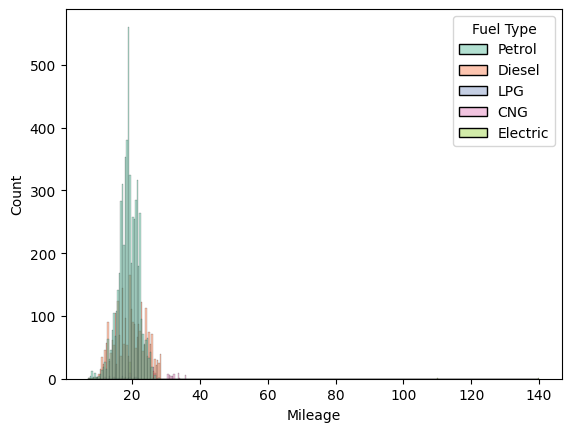

In [22]:
sns.histplot(x='Mileage',data=df,hue='Fuel Type',palette='Set2')
plt.show()

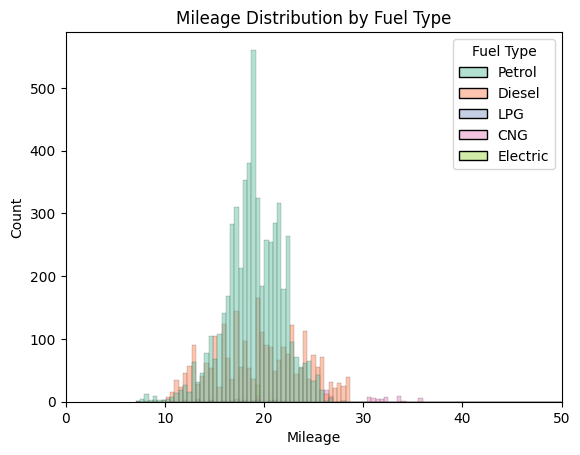

In [23]:
sns.histplot(x='Mileage', data=df, hue='Fuel Type', palette='Set2')
plt.xlim(0, 50)  # Adjust the range to focus on the relevant data
plt.title("Mileage Distribution by Fuel Type")
plt.show()


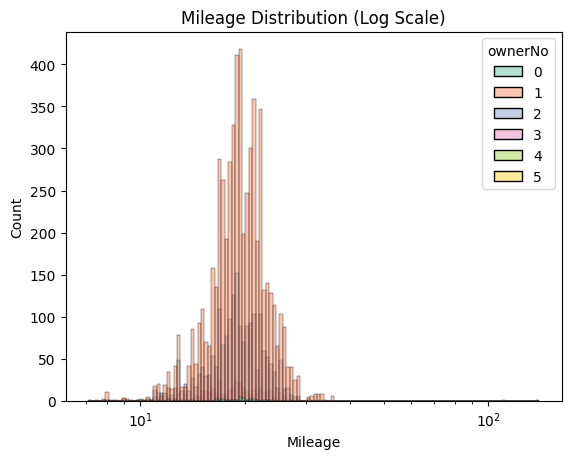

In [31]:
sns.histplot(x='Mileage', data=df, hue='ownerNo', palette='Set2', log_scale=True)
plt.title("Mileage Distribution (Log Scale)")
plt.show()


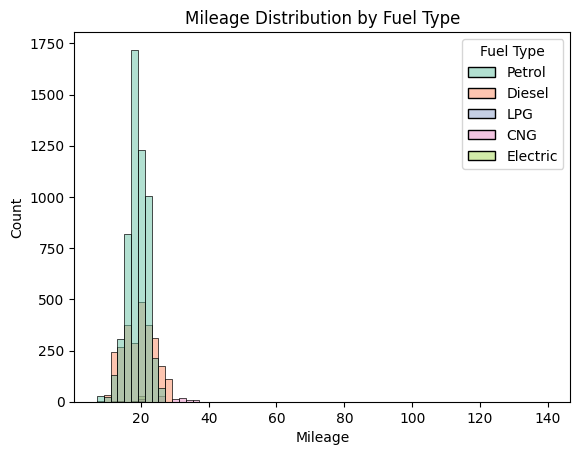

In [32]:
sns.histplot(x='Mileage', data=df, hue='Fuel Type', palette='Set2', binwidth=2)  # Adjust binwidth as needed
plt.title("Mileage Distribution by Fuel Type")
plt.show()


## Categorical vs Numerical

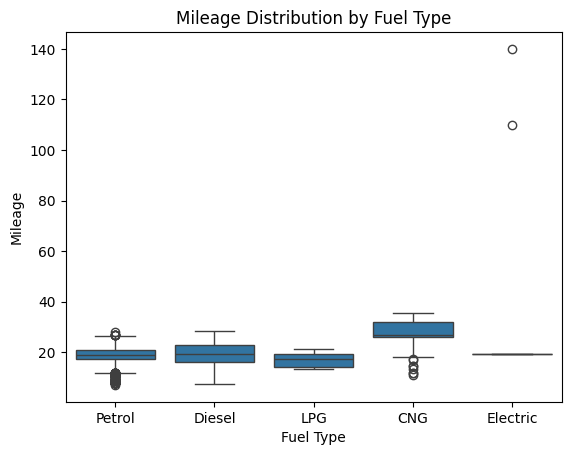

In [39]:
sns.boxplot(x='Fuel Type', y='Mileage', data=df,legend=False)
plt.title("Mileage Distribution by Fuel Type")
plt.show()


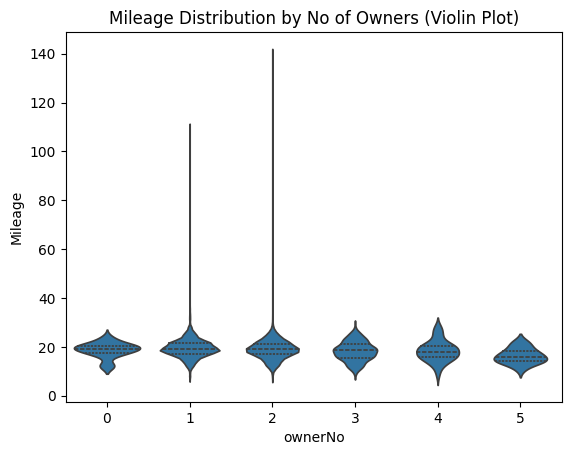

In [40]:
sns.violinplot(x='ownerNo', y='Mileage', data=df, inner='quartile')
plt.title("Mileage Distribution by No of Owners (Violin Plot)")
plt.show()


C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_10924\7905167.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bt', y='Mileage', data=df, palette='Set2', estimator=np.mean)


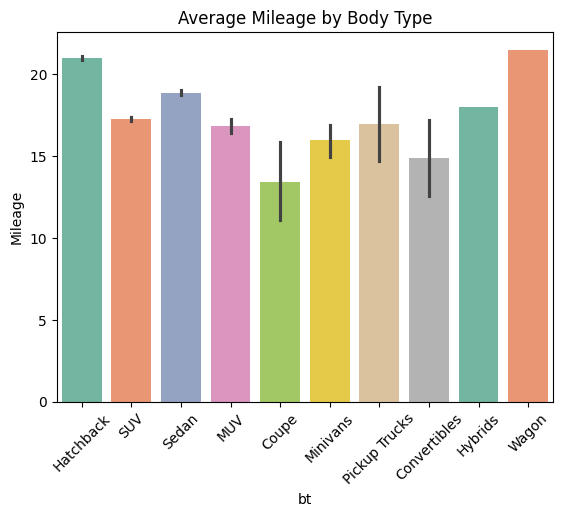

In [46]:
sns.barplot(x='bt', y='Mileage', data=df, palette='Set2', estimator=np.mean)
plt.title("Average Mileage by Body Type")
plt.xticks(rotation=45)
plt.show()


In [48]:
df['Gear Box'].value_counts()

Gear Box
5 Speed              4522
6 Speed              1082
5-Speed               543
7 Speed               262
6-Speed               237
                     ... 
5 speed manual          1
9 -speed                1
8-speed tiptronic       1
7-Speed S tronic        1
eCVT                    1
Name: count, Length: 115, dtype: int64

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_10924\2925862253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No of Cylinder', y='Mileage', data=df, palette='Set2', estimator=np.mean)


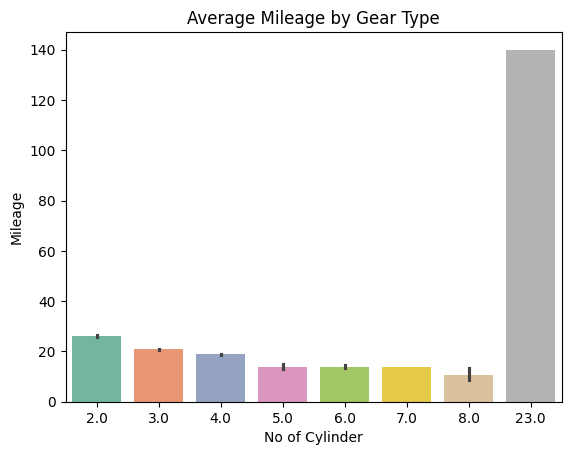

In [49]:
sns.barplot(x='No of Cylinder', y='Mileage', data=df, palette='Set2', estimator=np.mean)
plt.title("Average Mileage by Gear Type")
plt.show()


In [52]:
df = df[df['No of Cylinder']<10]

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_10924\3471006267.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No of Cylinder', y='Mileage', data=df, palette='Set2', estimator=np.mean)


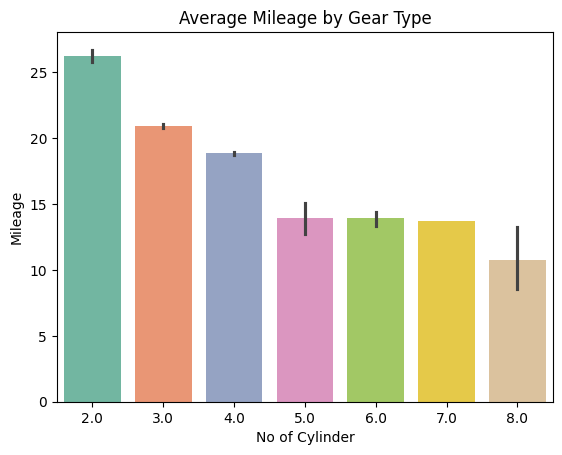

In [53]:
sns.barplot(x='No of Cylinder', y='Mileage', data=df, palette='Set2', estimator=np.mean)
plt.title("Average Mileage by Gear Type")
plt.show()

In [57]:
df[df['No of Cylinder']==2]

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,Wheel Size,Color,No of Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized,km_scaled,Mileage_scaled
855,Third Party insurance,Petrol,624 cc,2011.0,Petrol,Hatchback,Manual,2,Tata,Tata Nano,12.0,Other,2.0,MPFI,No,3099.0,1495.0,1620.0,2230.0,4 Speed,RWD,4.0,Power,"tubeless,radial",4.0,104.781992,26.00,SOHC,No,4.0,Bangalore,610.00,11.289794,18.41,0.852680,0.142341
898,Third Party insurance,Petrol,624 cc,2011.0,Petrol,Hatchback,Manual,4,Tata,Tata Nano,12.0,Others,2.0,MPFI,No,3099.0,1495.0,1620.0,2230.0,4 Speed,RWD,4.0,Power,"tubeless,radial",4.0,104.781992,26.00,SOHC,No,4.0,Bangalore,610.00,11.563955,18.41,1.000000,0.142341
995,Third Party insurance,Petrol,624 cc,2015.0,Petrol,Hatchback,Manual,3,Tata,Tata Nano,14.0,Violet,2.0,MPFI,No,3099.0,1495.0,1652.0,2230.0,4 Speed,RWD,4.0,Power,"tubeless,radial",4.0,80.000000,25.40,SOHC,No,4.0,Bangalore,1.85,10.819798,2.55,0.600127,0.137827
1366,Comprehensive,Petrol,624 cc,2015.0,Petrol,Hatchback,Automatic,1,Tata,Tata Nano,14.0,Purple,2.0,MPFI,No,3099.0,1495.0,1652.0,2230.0,4 Speed,RWD,4.0,Power,"tubeless,radial",4.0,80.000000,25.40,SOHC,No,4.0,Bangalore,3.35,9.702973,3.35,0.000000,0.137827
2079,Third Party insurance,Petrol,624 cc,2014.0,Petrol,Hatchback,Manual,1,Tata,Tata Nano,14.0,Violet,2.0,MPFI,No,3099.0,1495.0,1652.0,2230.0,4 Speed,RWD,4.0,Power,"tubeless,radial",4.0,80.000000,25.40,SOHC,No,4.0,Chennai,1.50,10.596660,2.55,0.480223,0.137827
2095,Third Party insurance,Diesel,793 cc,2016.0,Diesel,Hatchback,Manual,1,Maruti,Maruti Celerio,15.0,Blue,2.0,CRDi,No,3600.0,1600.0,1560.0,2425.0,5 Speed,FWD,5.0,Power,"tubeless,radial",5.0,235.000000,27.62,SOHC,No,4.7,Chennai,3.50,11.563955,3.50,1.000000,0.154529
2199,Third Party insurance,Petrol,624 cc,2014.0,Petrol,Hatchback,Manual,1,Tata,Tata Nano,14.0,Purple,2.0,MPFI,No,3099.0,1495.0,1652.0,2230.0,4 Speed,RWD,4.0,Power,"tubeless,radial",4.0,80.000000,25.40,SOHC,No,4.0,Chennai,1.25,10.571343,2.55,0.466619,0.137827
2314,Third Party insurance,Petrol,624 cc,2012.0,Petrol,Hatchback,Manual,2,Tata,Tata Nano,12.0,Others,2.0,MPFI,No,3099.0,1495.0,1652.0,2230.0,4 Speed,RWD,4.0,Manual,"tubeless,radial",4.0,500.000000,25.40,SOHC,No,4.0,Chennai,870.00,11.002117,18.41,0.698096,0.137827
3273,Third Party insurance,Diesel,793 cc,2015.0,Diesel,Hatchback,Manual,4,Maruti,Maruti Celerio,15.0,Others,2.0,CRDi,No,3600.0,1600.0,1560.0,2425.0,5 Speed,FWD,5.0,Power,"tubeless,radial",5.0,235.000000,27.62,SOHC,No,4.7,Delhi,2.20,11.289794,2.55,0.852680,0.154529
4532,Third Party insurance,Diesel,793 cc,2016.0,Diesel,Hatchback,Manual,1,Maruti,Maruti Celerio,15.0,White,2.0,CRDi,No,3600.0,1600.0,1560.0,2425.0,5 Speed,FWD,5.0,Power,"tubeless,radial",5.0,235.000000,27.62,SOHC,No,4.7,Hyderabad,4.00,11.289794,4.00,0.852680,0.154529


### Which One Should You Use?
- **To compare distributions & outliers** → 🟢 **Box Plot**
- **To see the shape of distribution** → 🟢 **Violin Plot**
- **To compare means/trends** → 🟢 **Bar Plot**
- **To see every data point** → 🟢 **Swarm Plot**


# Distribution of Features 

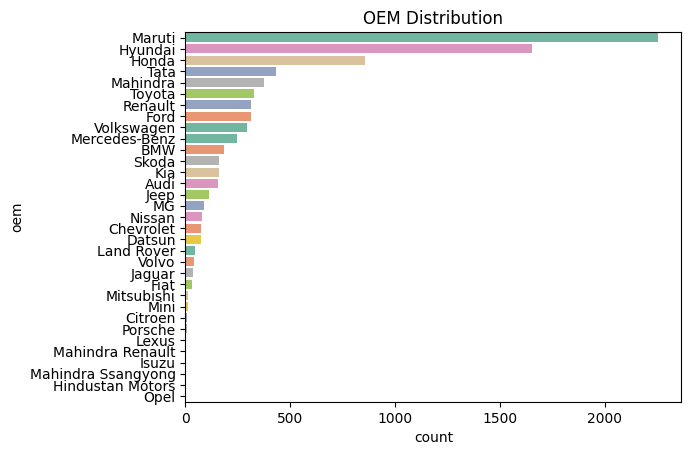

In [67]:
sns.countplot(y='oem', data=df, hue='oem', palette='Set2', order=df['oem'].value_counts().index, legend=False)
plt.title("OEM Distribution")
plt.show()
